# Table of contents

1. Importing libraries and data
2. Preparing data for analysis
3. Looking for correlations
4. Heatmap
5. Scatterplots
6. Pair plots
7. Categorical plot

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Importing cleaned dataset

cleaned_excel_file_path = '/Users/zoey/Career Foundry Stuff/Achievement 6/cleaned_NBA_data.xlsx'
df_clean = pd.read_excel(cleaned_excel_file_path)

In [3]:
# Checking

df_clean.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,attended_college
0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,True
1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,True
2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,12,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,True
3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,7,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,True
4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,True


# 2. Preparing data for analysis

In [4]:
# Dropping columns I don't need

columns_to_drop = ["oreb_pct", "dreb_pct", "ts_pct", "ast_pct"]
df_clean.drop(columns=columns_to_drop, inplace=True)

In [5]:
df_clean.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,usg_pct,season,attended_college
0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.169,1996-97,True
1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.174,1996-97,True
2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.175,1996-97,True
3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.206,1996-97,True
4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.195,1996-97,True


# 3. Looking for correlations

In [10]:
# Creating a correlation matrix using pandas only for columns containing numeric data

# Select only numeric columns
numeric_columns = df_clean.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print correlation matrix
print(correlation_matrix)

                    age  player_height  player_weight        gp       pts  \
age            1.000000      -0.007904       0.063561  0.057442  0.011353   
player_height -0.007904       1.000000       0.822141  0.004963 -0.055284   
player_weight  0.063561       0.822141       1.000000  0.022828 -0.025023   
gp             0.057442       0.004963       0.022828  1.000000  0.536003   
pts            0.011353      -0.055284      -0.025023  0.536003  1.000000   
reb            0.037386       0.424220       0.438112  0.471405  0.624509   
ast            0.092359      -0.442781      -0.371675  0.382726  0.664320   
net_rating     0.092896      -0.003074       0.003547  0.248412  0.215199   
usg_pct       -0.113882      -0.104011      -0.065811  0.147248  0.641469   

                    reb       ast  net_rating   usg_pct  
age            0.037386  0.092359    0.092896 -0.113882  
player_height  0.424220 -0.442781   -0.003074 -0.104011  
player_weight  0.438112 -0.371675    0.003547 -0.065811

# 4. Heatmap

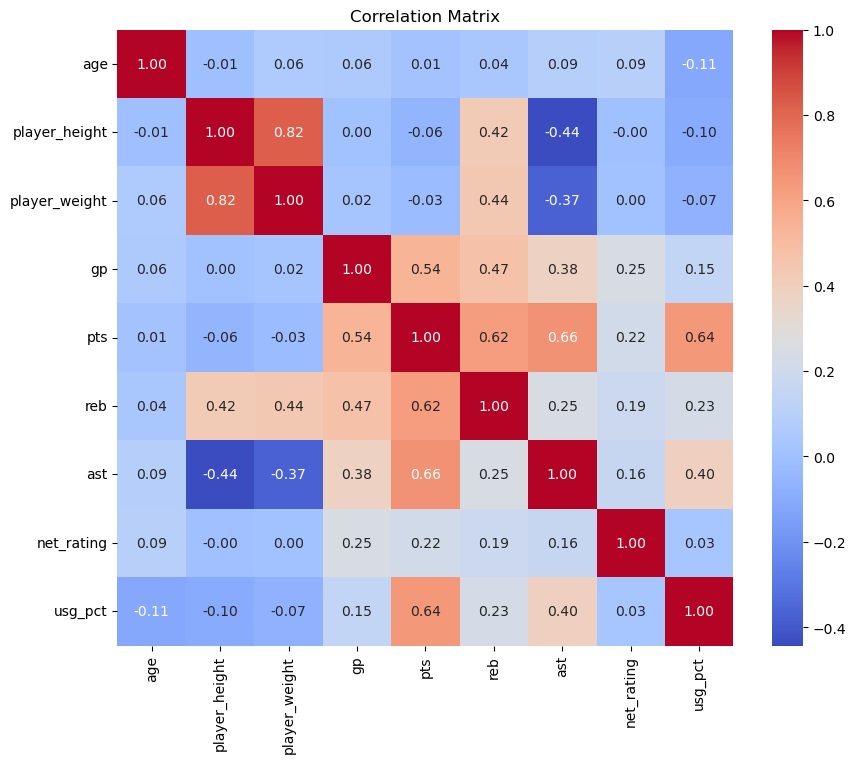

In [8]:
# Displaying the correlation matrix as a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In this heatmap, we can see certain relationships between the variables. 

There are correlations between: 
- usage percentage and points (0.64) and usage percentage and assists (0.40), which is logical, since the more a player is on the court, the more chance they have of scoring points or dishing out assists;
- assists and points (0.66)
- rebounds and player height (0.42), rebounds and player weight (0.44), rebounds and games played (0.47), and rebounds and points (0.62)
- points and games played (0.54)
- player weight and player height (0.82)

There are negative correlations between:
- assists and player height (-0.44) and assists and player weight (-0.37)

Overall, we can see that taller and heavier players are more likely to get rebounds. Other than that, we see that there is a very straight forward relationship between player usage/games played and the amounts of points, assists, and rebounds. 

One thing I do find suprising and unexpected is that player age is almost in no way correlated with any of the other variables. I would have expected age to play a role in almost all the other categories and will look at this further.

# 5. Scatterplots

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


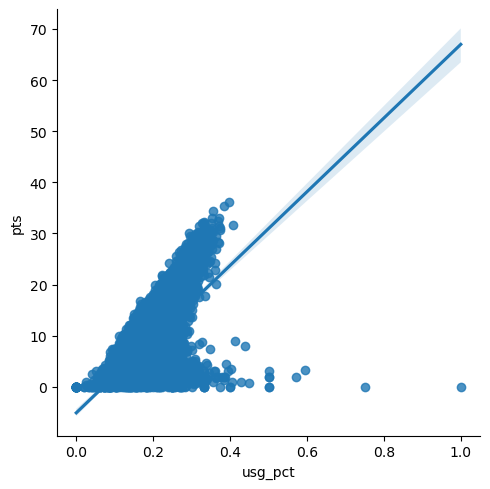

In [12]:
# Create a scatterplot for the "usage percentage" and "points" columns in seaborn

sns.lmplot(x = 'usg_pct', y = 'pts', data = df_clean)

Here we see a strong correlation between points and usage percentage. However, the data points dont entirely follow the trend line, with some notable outliers representing players with very high usage percentages who have very low points production. It is possible that these players are contributing to their teams' outputs in other ways, such as facilitating playmaking or being very good at blocks, steals, rebounds, or assists, which is why they show such high usage. 

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


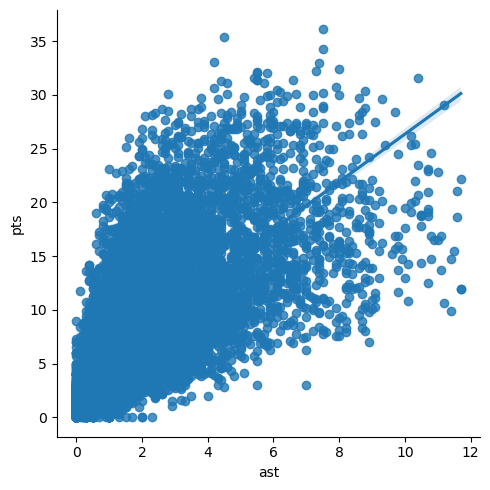

In [13]:
# Create a scatterplot for the "assists" and "points" columns in seaborn

sns.lmplot(x = 'ast', y = 'pts', data = df_clean)

This scatterplot shows a pretty wide range, with a lot of points relatively far away from the trend line in both directions. However, there are few distinct notable outliers, and altogether the strong correlation of 0.66 seems to hold. 

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


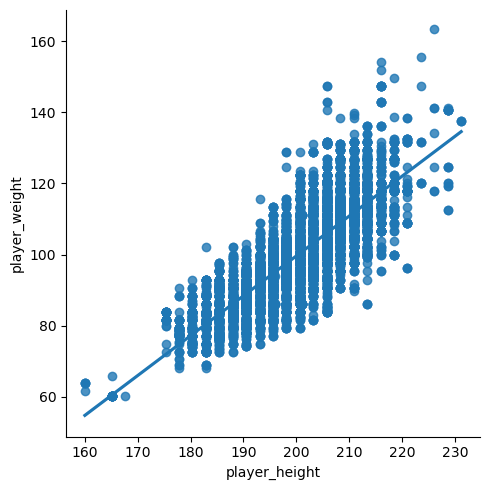

In [14]:
# Create a scatterplot for the "player height" and "player weight" columns in seaborn

sns.lmplot(x = 'player_height', y = 'player_weight', data = df_clean)

In line with the strong correlation of 0.82, we can see a clear direct relationship with player height and weight (which also makes simple intuitive sense). While there are some minor outliers, there are no notable outliers that deviate far from the rest of the data points. 

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


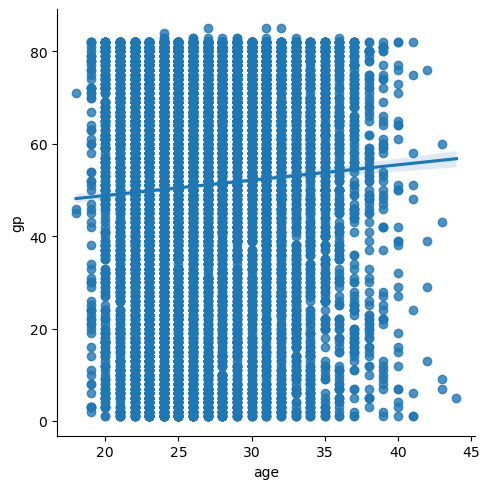

In [15]:
# Create a scatterplot for the "age" and "games played" columns in seaborn

sns.lmplot(x = 'age', y = 'gp', data = df_clean)

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


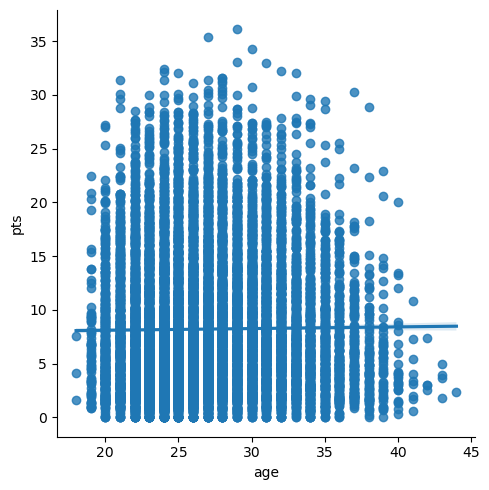

In [16]:
# Create a scatterplot for the "age" and "points" columns in seaborn

sns.lmplot(x = 'age', y = 'pts', data = df_clean)

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


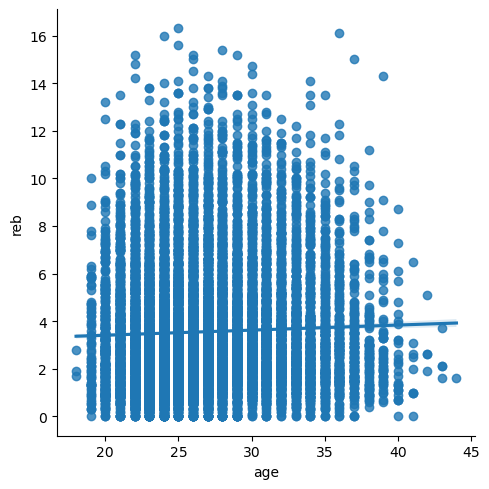

In [18]:
# Create a scatterplot for the "age" and "rebounds" columns in seaborn

sns.lmplot(x = 'age', y = 'reb', data = df_clean)

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


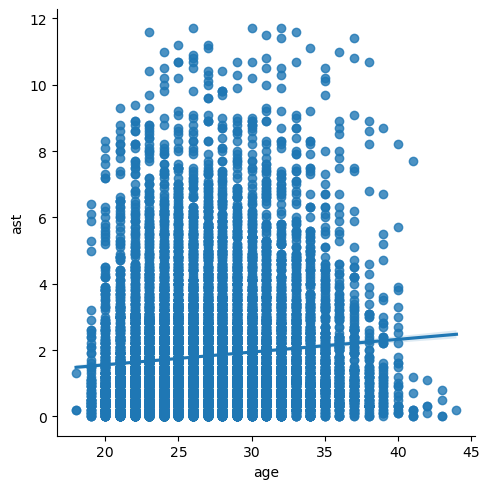

In [19]:
# Create a scatterplot for the "age" and "assists" columns in seaborn

sns.lmplot(x = 'age', y = 'ast', data = df_clean)

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


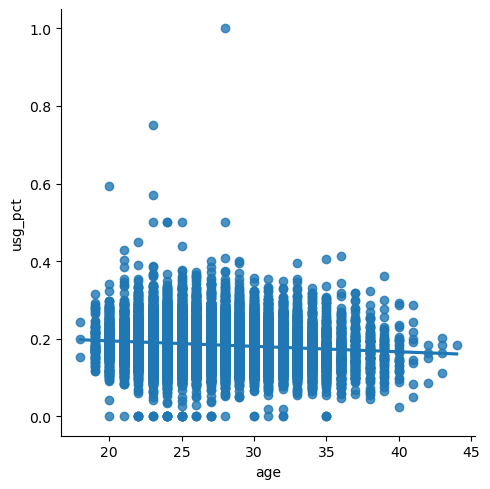

In [20]:
# Create a scatterplot for the "age" and "usage percentage" columns in seaborn

sns.lmplot(x = 'age', y = 'usg_pct', data = df_clean)

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


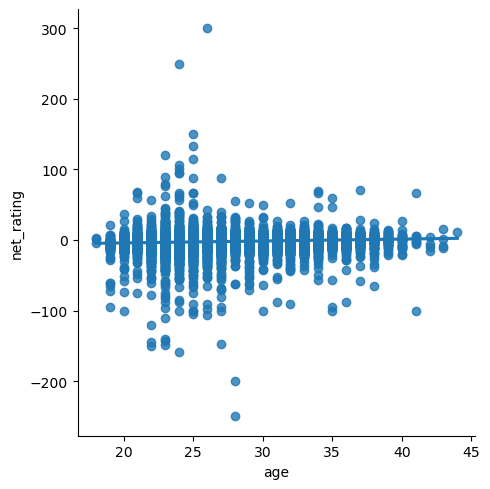

In [21]:
# Create a scatterplot for the "age" and "net rating" columns in seaborn

sns.lmplot(x = 'age', y = 'net_rating', data = df_clean)

# 6. Pair plots

In [30]:
# Creating a subset keeping only the variables to be used in the pair plot

sub_2 = df_clean[['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'usg_pct', 'net_rating']]

In [31]:
sub_2

,age,player_height,player_weight,gp,pts,reb,ast,usg_pct,net_rating
0,22,193.04,94.800728,64,3.9,1.5,2.4,0.169,0.3
1,28,190.50,86.182480,4,3.8,1.3,0.3,0.174,8.9
2,26,203.20,103.418976,41,8.3,6.4,1.9,0.175,-8.2
3,30,203.20,102.058200,64,10.2,2.8,1.7,0.206,-2.7
4,23,213.36,119.748288,52,2.8,1.7,0.3,0.195,-14.1
...,...,...,...,...,...,...,...,...,...
12839,29,213.36,127.005760,66,33.1,10.2,4.2,0.370,8.8
12840,20,213.36,86.182480,19,2.4,0.9,0.6,0.102,-16.1
12841,25,205.74,102.511792,71,13.1,6.5,1.2,0.168,-0.2
12842,24,208.28,113.398000,52,3.4,4.7,0.5,0.074,-6.7


/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

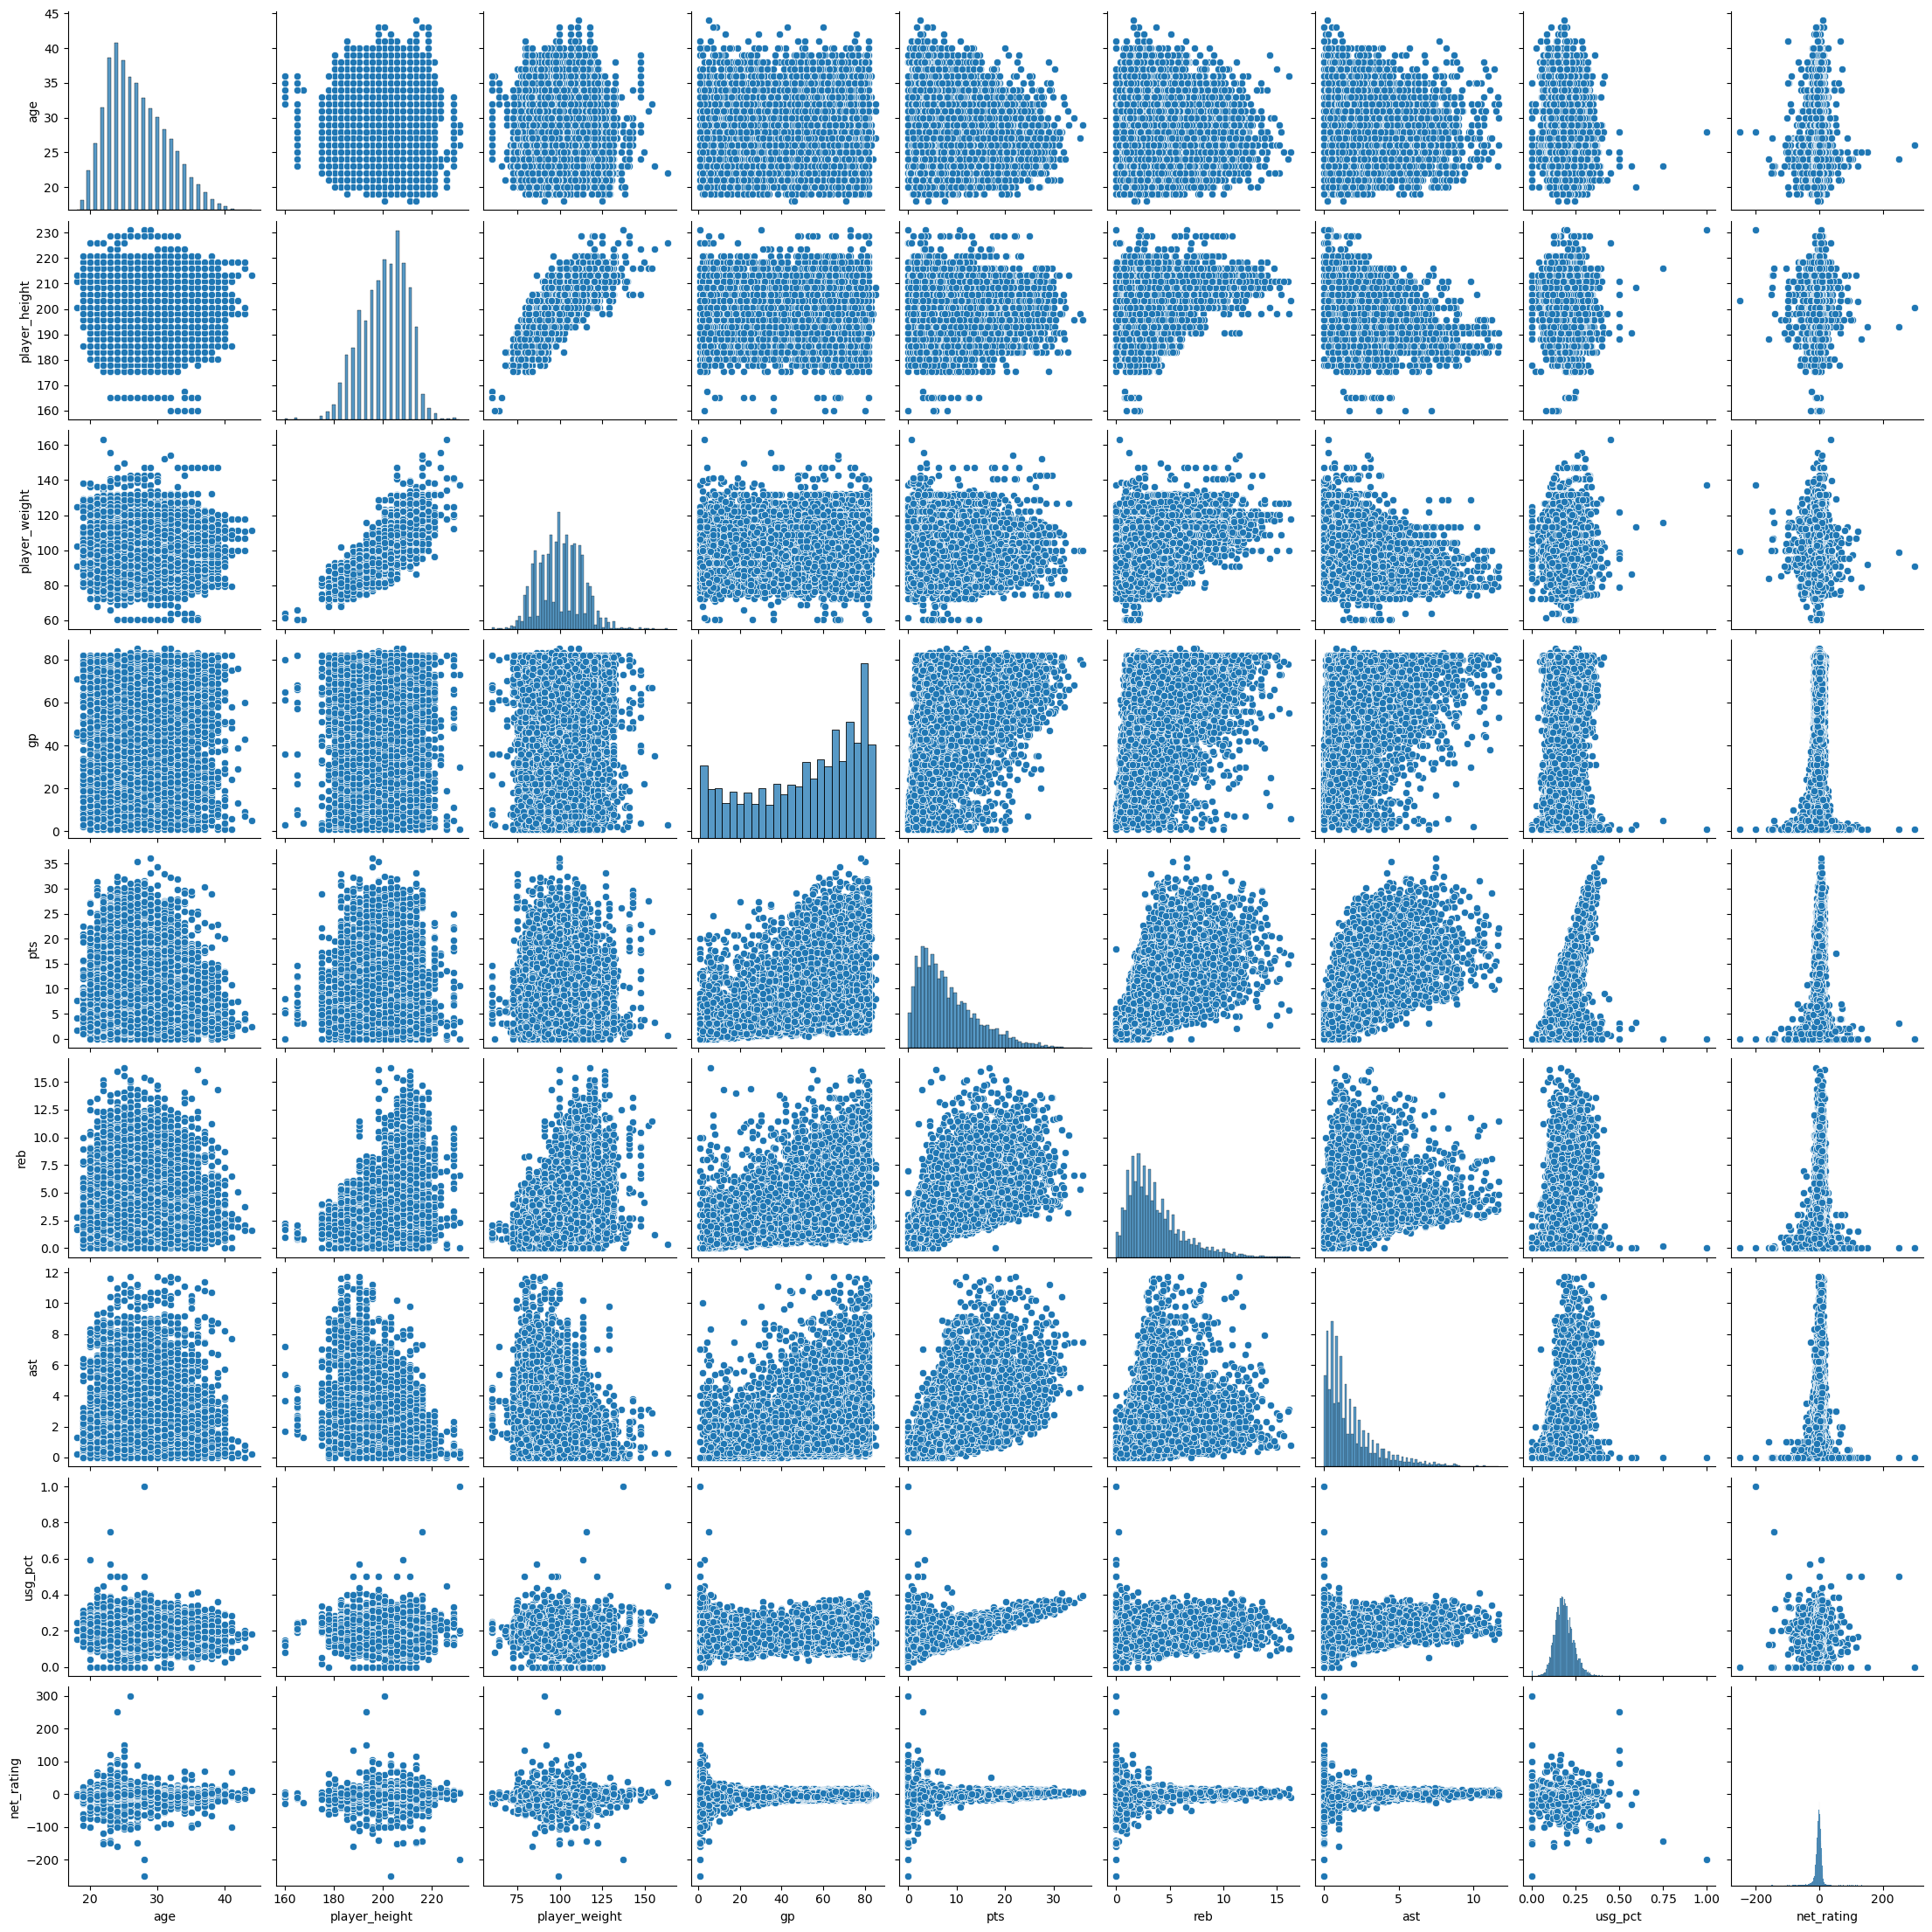

In [32]:
# Create a pair plot 

g = sns.pairplot(sub_2)

I would like to explore the age and usage percentage relationship more. The other interesting scatterplots have been addressed above. 

# 7. Categorical plot

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

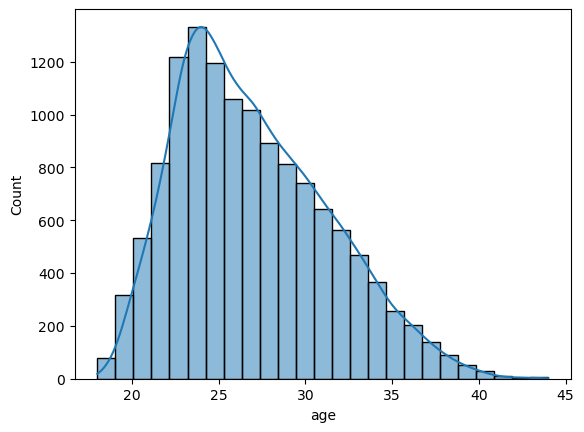

In [33]:
# Use a histogram to visualize the distribution of the 'age' variables. 

sns.histplot(df_clean['age'], bins = 25, kde = True)

In [35]:
df_clean.loc[df_clean['age'] < 22, 'Age range'] = 'younger player'
df_clean.loc[(df_clean['age'] >= 22) & (df_clean['age'] < 29), 'Age range'] = 'average aged player'
df_clean.loc[df_clean['age'] >= 29, 'Age range'] = 'older'

In [38]:
df_clean['Age range'].value_counts(dropna = False)

Age range
average aged player    7528
older                  4385
younger player          931
Name: count, dtype: int64

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


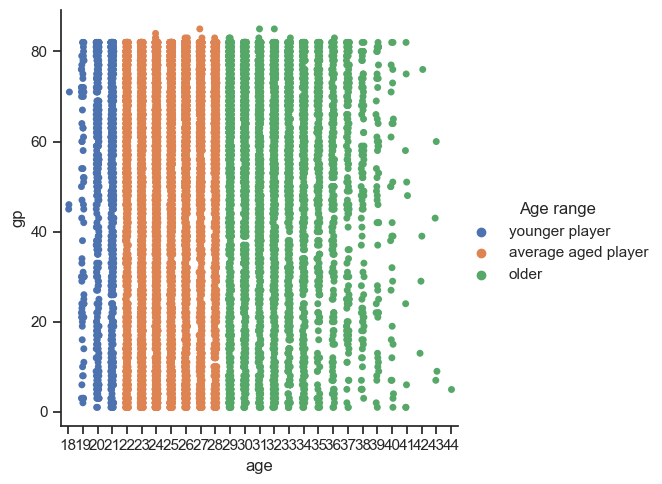

In [40]:
# Creating a categorical plot in seaborn using the age ranges created above

sns.set(style="ticks")
g = sns.catplot(x="age", y="gp", hue="Age range", data=df_clean)

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


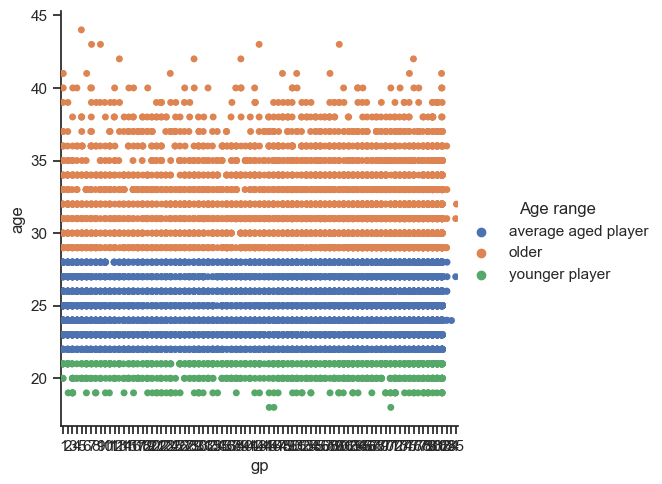

In [41]:
# Creating a categorical plot in seaborn using the age ranges created above

sns.set(style="ticks")
g = sns.catplot(x="gp", y="age", hue="Age range", data=df_clean)

The exploration of the data thus far has not lead to answers for the originally posed questions. However, it does raise further interesting questions around the topics of age and net rating as well as age and usage percentage. There were some notable outliers there that will require further analysis. Additionally, there will be geographic analysis necessary to look at country of origin, as well as temporal analysis to examine changes over time (seasons). 